# <center> SPACY ON MUSIC </center>

<p> In this project we attempted a series of studies using the SPACY library of PYTHON to perform sentiment analysis, entity analysis, parsing of grammar and keyword extraction on different artists and their original compositions. </p>

##### Clean the cells

In [225]:

%reset -f
!pip install -U spacy==3.2.0
!python -m spacy download 'pt_core_news_lg'


DEPRECATION: https://github.com/explosion/spacy-models/releases/download/pt_core_news_lg-3.2.0/pt_core_news_lg-3.2.0-py3-none-any.whl#egg=pt_core_news_lg==3.2.0 contains an egg fragment with a non-PEP 508 name pip 25.0 will enforce this behaviour change. A possible replacement is to use the req @ url syntax, and remove the egg fragment. Discussion can be found at https://github.com/pypa/pip/issues/11617
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 577.4/577.4 MB 4.7 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_lg')


# <center> SENTIMENT ANALYSIS </center>

<p> In the code below, we parse the datasets contained in the 'singer' directory. These datasets are song lyrics by random singers. We analyzed each composition individually, extracting whether or not the lyrics are romantic, or if they belong to a neutral genre. After an individual analysis of each composition, there is a general analysis of the singer or band. Also saying whether or not he is romantic. </p>

General Report:
Sentiment Analysis Results:
         ARTIST                        SONG CONNOTATION VALUE
0    NANDO REIS             BABY, EU QUERIA    ROMANTIC     1
1    NANDO REIS      A HISTÓRIA DE FERNANDO     NEUTRAL     0
2    NANDO REIS                 AMOR À VIDA    ROMANTIC     7
3    NANDO REIS            AZUL DE PRESUNTO     NEUTRAL     0
4    NANDO REIS   AS COISAS TÃO MAIS LINDAS     NEUTRAL     0
..          ...                         ...         ...   ...
244      CAZUZA                   ERA ASSIM     NEUTRAL     0
245      CAZUZA          DE QUEM É O PODER?     NEUTRAL     0
246      CAZUZA                 BILLY NEGÃO    ROMANTIC     1
247      CAZUZA             BILHETINHO AZUL    ROMANTIC     4
248      CAZUZA        A ORELHA DE EURÍDICE    ROMANTIC     2

[249 rows x 4 columns]


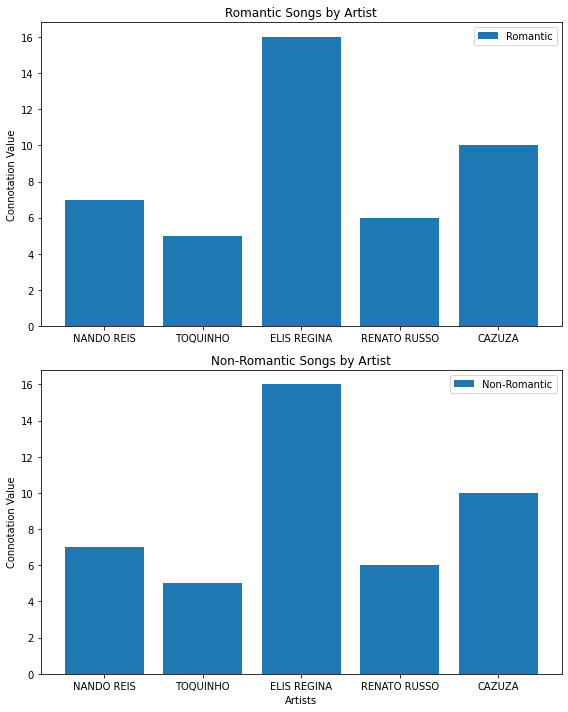

In [228]:
import json
import os
import spacy
import matplotlib.pyplot as plt
import pandas as pd

# main variables
pathFull = os.getcwd()
dirFull = os.path.dirname(pathFull)
dirBase = os.path.abspath(os.path.join(dirFull, os.pardir, os.pardir))
data = open(f"{dirBase}/ia/nlp/param/data.json")
var = json.load(data)
dataset = f"{dirBase}/{var['dataset_dir']}"
nlp = spacy.load('pt_core_news_lg')

dir_path = [os.path.abspath(os.path.join(dataset, dir_path)) for dir_path in os.listdir(dataset) if os.path.isdir(os.path.join(dataset, dir_path))]
total_songs = 0
total_positive = 0
total_negative = 0

# Create an empty dataframe
df = pd.DataFrame(columns=['ARTIST', 'SONG', 'CONNOTATION', 'VALUE'])

# code
for file_name in dir_path:
    artist_name = os.path.basename(file_name)
    artist_positive = 0
    artist_negative = 0

    for file in os.listdir(file_name):
        file_path = os.path.join(file_name, file)
        with open(file_path, "r", encoding="utf-8") as file:
            txt = file.read()
            outRows = txt.splitlines()[:2]
            titles = outRows[0]
            contentRaw = txt.splitlines()[2:]
            content = '\n'.join(contentRaw).lower()

        document = nlp(content)

        num_positive = 0
        num_negative = 0

        for token in document:
            conj = ["amor", "amar", "amarei", "amou", "amando"]
            if token.pos_ == 'NOUN':
                if token.text in conj:
                    num_positive += 1
                elif token.sentiment <= -0.5:
                    num_negative += 1

        if num_positive > num_negative:
            connotation = 'romantic'
            connotation_value = num_positive
        elif num_positive < num_negative:
            connotation = 'non-romantic'
            connotation_value = num_negative
        else:
            connotation = 'neutral'
            connotation_value = 0

        titles = titles.split("-")
        df = df.append({'ARTIST': artist_name.replace("_"," ").upper(), 'SONG': titles[1], 'CONNOTATION': connotation.upper(), 'VALUE': connotation_value}, ignore_index=True)

        total_songs += 1
        total_positive += num_positive
        total_negative += num_negative
        artist_positive += num_positive
        artist_negative += num_negative


if total_songs > 0:
    avg_positive = total_positive / total_songs
    avg_negative = total_negative / total_songs

    if avg_positive > avg_negative:
        connotation = 'romantic'
        connotation_value = avg_positive
    elif avg_positive < avg_negative:
        connotation = 'non-romantic'
        connotation_value = avg_negative
    else:
        connotation = 'neutral'
        connotation_value = 0

    print("General Report:")

    print("Sentiment Analysis Results:")
    print(df)

    plt.figure(figsize=(8, 10))

    plt.subplot(2, 1, 1)
    plt.bar(df['ARTIST'], df['VALUE'], label='Romantic')
    plt.ylabel('Connotation Value')
    plt.title('Romantic Songs by Artist')
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.bar(df['ARTIST'], df['VALUE'], label='Non-Romantic')
    plt.xlabel('Artists')
    plt.ylabel('Connotation Value')
    plt.title('Non-Romantic Songs by Artist')
    plt.legend()

    plt.tight_layout()
    plt.show()

else:
    print(f"No files found in the {artist_name.upper()} folder.")
